In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import helpers
%matplotlib inline

In [5]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [6]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

In [7]:
# construct a Standardized List
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


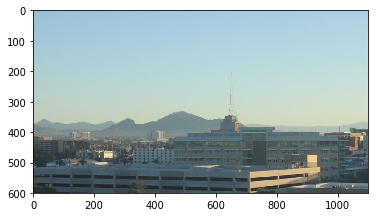

In [10]:
# Visualize the standardize data
image_num = 0
select_image = STANDARDIZED_LIST[image_num][0]
select_label = STANDARDIZED_LIST[image_num][1]
# Display image and data about it
plt.imshow(select_image)
print("Shape: "+str(select_image.shape))
print("Label [1 = day, 0 = night]: " + str(select_label))


# Feature Extraction

Label: 1


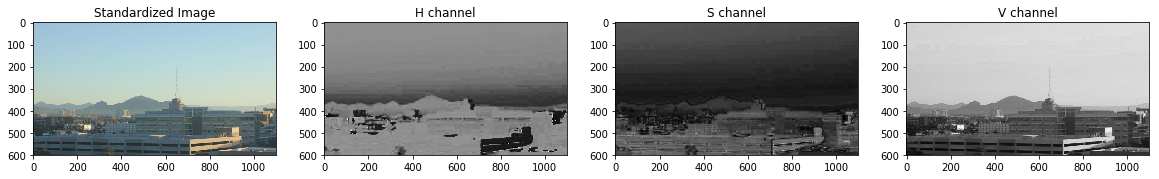

In [11]:
# convert RGB to HSV
image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# convert it to hsv
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

print('Label: ' + str(test_label))

#hsv channel
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

#plot the original image
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))

ax1.set_title('Standardized Image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

Find the Average Brightness using V channel


In [12]:
def avg_brightness(rgb_image):
    # convert imsage to hsv
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    # add all the pixels in V channel
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600 * 1100
    avg = sum_brightness/area
    return avg
    

Avg brightness: 175.1298712121212


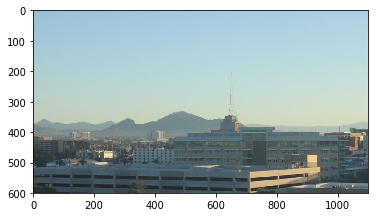

In [14]:
# Test avg brightness level
image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: '+ str(avg))
plt.imshow(test_im)

Avg brightness: 35.217


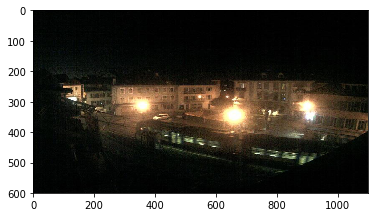

In [15]:
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: '+ str(avg))
plt.imshow(test_im)